Problem Statement:  
For a safe and secure lending experience, it's important to analyze the past data. In this project, you have to build a deep learning model to predict the chance of default for future loans using historical data. As you will see, this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.


**Objective:**

Create a model that predicts whether or not an applicant will be able to repay a loan using historical data


**Domain:** Finance

**Analysis to be done:**

Perform data preprocessing and build a deep learning prediction model

**Steps to be done**

1.   Load the dataset that is given to youList item
2.  Check for null values in the dataset
3.   Print the percentage of default to a payer of the dataset for the TARGET column
4.  Balance the dataset if the data is imbalanced
5.  Plot the balanced or imbalanced data
6.  	Encode the columns that are required for the model
7. Calculate sensitivity as a metric
8.   Calculate the area under the receiver operating characteristics curve









#Housing Loan Defaulter Prediction

##Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load Dataset**

##Load Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

loan_data = pd.read_csv('/content/drive/MyDrive/ML/loan_data.csv')
print(loan_data.shape)


(307511, 122)


Data is 122 columns, but we may not need all those columns. We will first extract features that have a meaningful correlation with TARGET and then check of null values and outliers for those features



##Get features with correlation > 0.03 with TARGET

In [3]:
corr = loan_data.select_dtypes(include='number').corr()
correlations = corr.abs().sort_values('TARGET',ascending=False).iloc[:,[1]]
corr = correlations.loc[correlations.TARGET > 0.033]
corr

,TARGET
TARGET,1.000000
EXT_SOURCE_3,0.178919
EXT_SOURCE_2,0.160472
EXT_SOURCE_1,0.155317
DAYS_BIRTH,0.078239
REGION_RATING_CLIENT_W_CITY,0.060893
REGION_RATING_CLIENT,0.058899
DAYS_LAST_PHONE_CHANGE,0.055218
DAYS_ID_PUBLISH,0.051457
REG_CITY_NOT_WORK_CITY,0.050994


Create a new dataset with the above features

##Create a new Dataset including only high correlation features

In [19]:
features = corr.index
data = loan_data[features]
print(data.shape)
#check null values
data.isnull().sum()


(307511, 25)


,0
TARGET,0
EXT_SOURCE_3,60965
EXT_SOURCE_2,660
EXT_SOURCE_1,173378
DAYS_BIRTH,0
REGION_RATING_CLIENT_W_CITY,0
REGION_RATING_CLIENT,0
DAYS_LAST_PHONE_CHANGE,1
DAYS_ID_PUBLISH,0
REG_CITY_NOT_WORK_CITY,0


##Plot Distributions

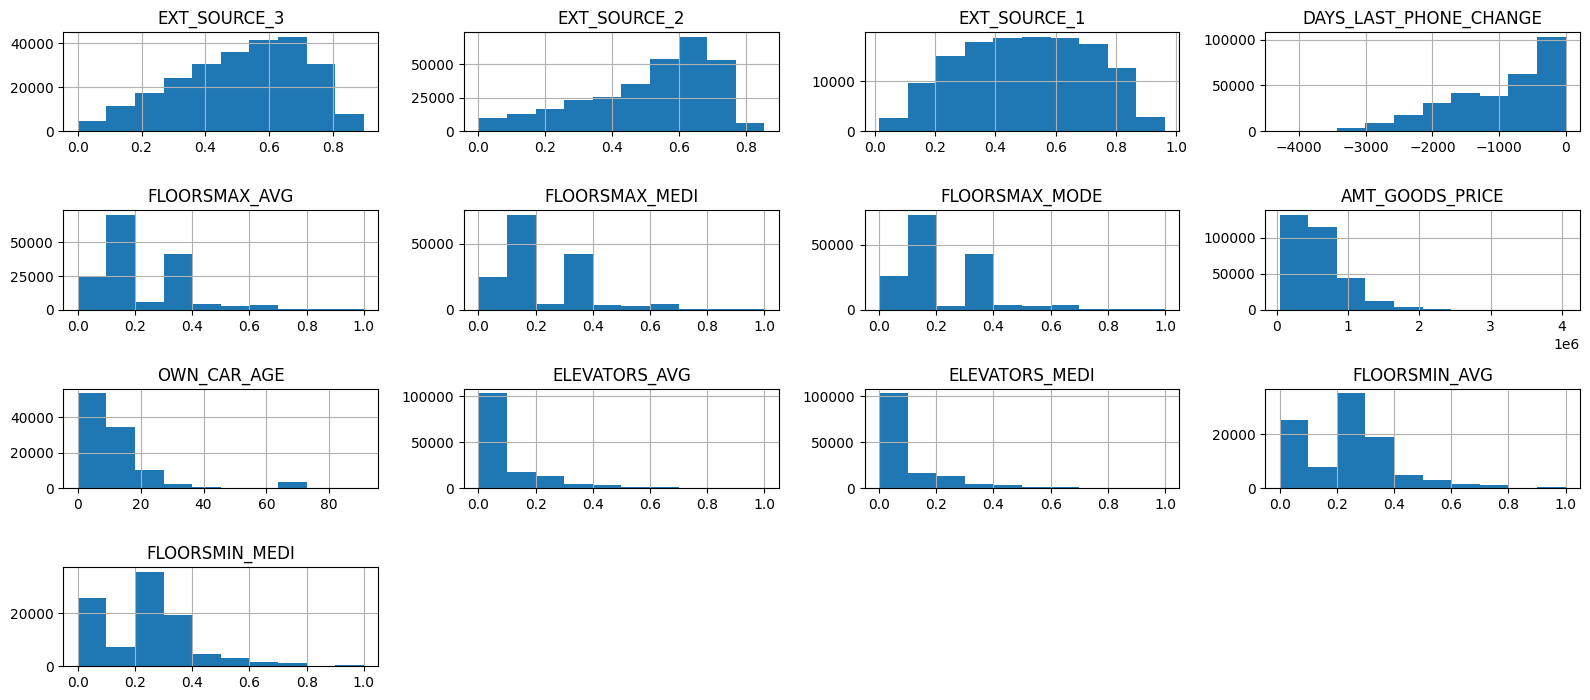

In [20]:
columns = []
# lets look at the distributions of columns that have null values
for col in data.columns:
  if data[col].isnull().any():
    columns.append(col)

data[columns].hist(figsize=(16,14),layout=(8,4))
plt.tight_layout()
plt.show()


##Check for outliers

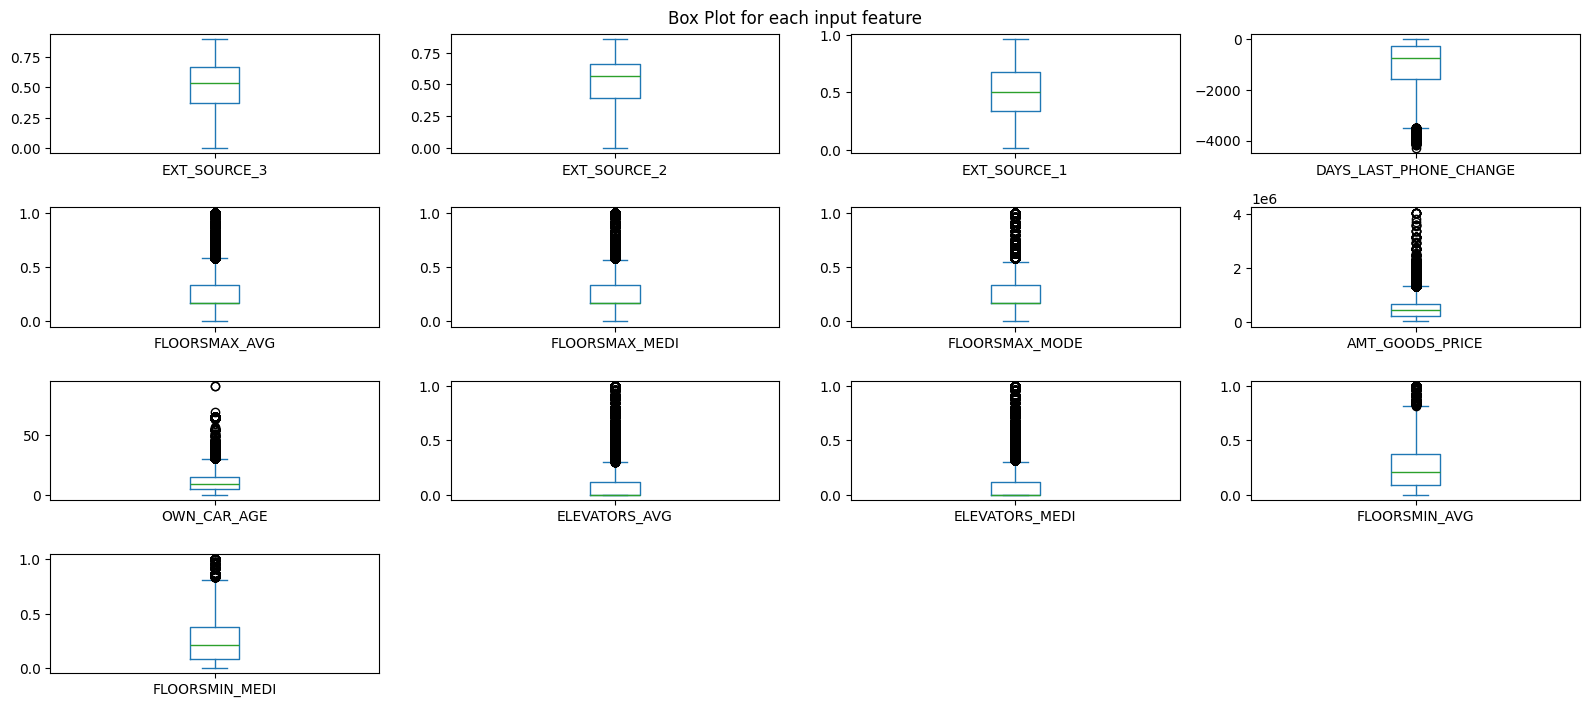

In [21]:
data[columns].plot(kind='box',
                       subplots=True,
                       layout=(8,4),
                       sharex=False,
                       sharey=False,
                       figsize=(16,14),
                       title='Box Plot for each input feature')
plt.tight_layout()
plt.show()

###Replace outliers and null values with median

In [22]:
import numpy as np

def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3 - q1
    lwr_bound = q1 - (1.5 * IQR)
    upr_bound = q3 + (1.5 * IQR)
    outliers = []
    for i in data:
        if i < lwr_bound or i > upr_bound:
            outliers.append(i)
    return outliers


def remove_outliers(data, outlier_columns):

  for column in outlier_columns:
      print('imputing values for column ',column)
      array = data[column]
      outliers = detect_outliers_iqr(array)
      value = np.median(array)
      for i in outliers:
          # for every i(outlier) in array , replace it by value else retain the same array element
          array = np.where(array == i, value, array)
          data[column] = np.asarray(array)

  return data

# Fill null values
for column in columns:
  data[column].fillna(new_data[column].median(),inplace=True)

# null values replaced
print('Are null values present? -> ',data.isnull().sum().any())

# Remove outliers
new_data = remove_outliers(data, columns)


Are null values present? ->  False
imputing values for column  EXT_SOURCE_3
imputing values for column  EXT_SOURCE_2
imputing values for column  EXT_SOURCE_1
imputing values for column  DAYS_LAST_PHONE_CHANGE
imputing values for column  FLOORSMAX_AVG
imputing values for column  FLOORSMAX_MEDI
imputing values for column  FLOORSMAX_MODE
imputing values for column  AMT_GOODS_PRICE
imputing values for column  OWN_CAR_AGE
imputing values for column  ELEVATORS_AVG
imputing values for column  ELEVATORS_MEDI
imputing values for column  FLOORSMIN_AVG
imputing values for column  FLOORSMIN_MEDI


###Re-plot the distributions to see outliers

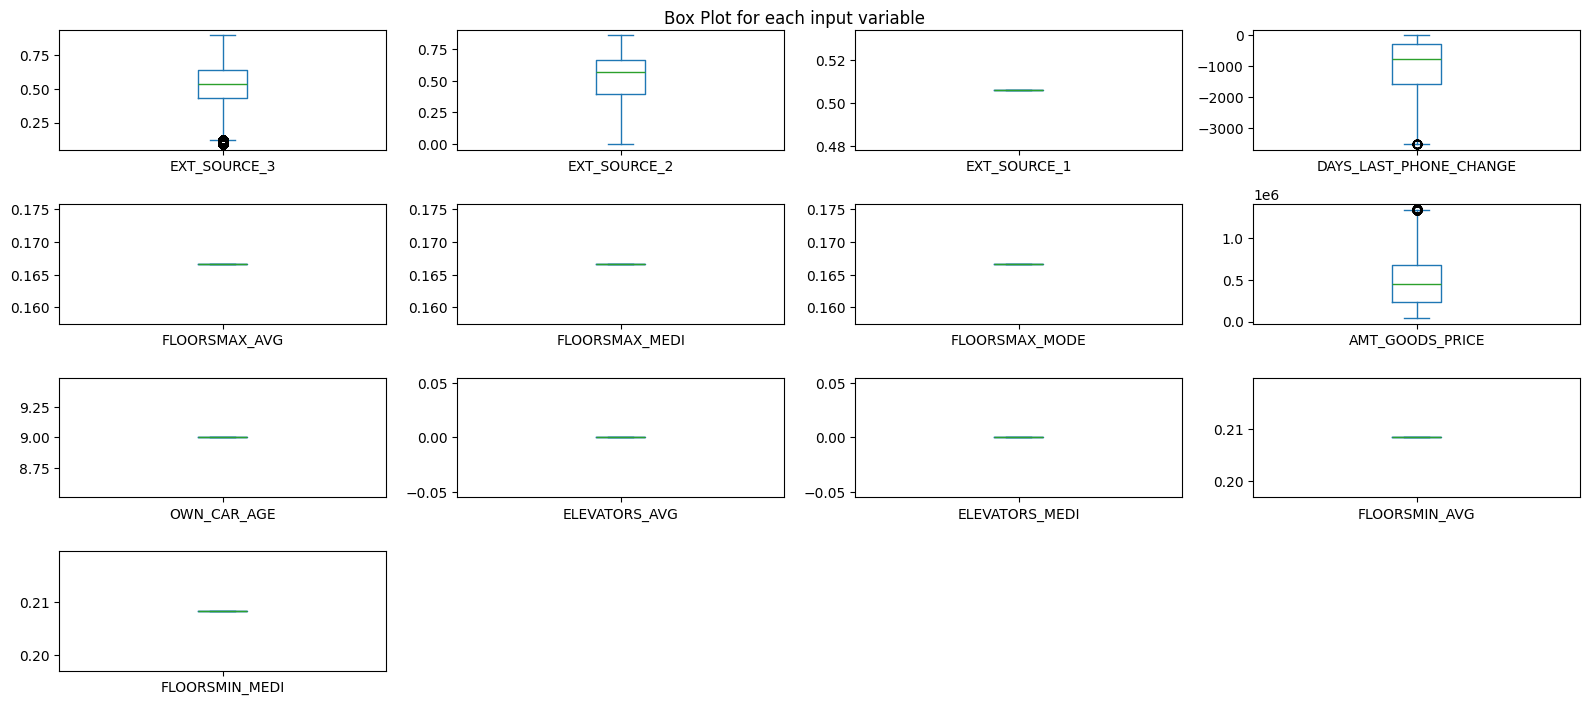

In [23]:
data[columns].plot(kind='box',
                       subplots=True,
                       layout=(8,4),
                       sharex=False,
                       sharey=False,
                       figsize=(16,14),
                       title='Box Plot for each input variable')
plt.tight_layout()
plt.show()

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   EXT_SOURCE_3                 307511 non-null  float64
 2   EXT_SOURCE_2                 307511 non-null  float64
 3   EXT_SOURCE_1                 307511 non-null  float64
 4   DAYS_BIRTH                   307511 non-null  int64  
 5   REGION_RATING_CLIENT_W_CITY  307511 non-null  int64  
 6   REGION_RATING_CLIENT         307511 non-null  int64  
 7   DAYS_LAST_PHONE_CHANGE       307511 non-null  float64
 8   DAYS_ID_PUBLISH              307511 non-null  int64  
 9   REG_CITY_NOT_WORK_CITY       307511 non-null  int64  
 10  FLAG_EMP_PHONE               307511 non-null  int64  
 11  DAYS_EMPLOYED                307511 non-null  int64  
 12  REG_CITY_NOT_LIVE_CITY       307511 non-null  int64  
 13 

No column needs to be encoded

##Percentage of defaulters

In [25]:
total_borrowers = data.shape[0]
value_counts_1 = pd.DataFrame(data[new_data['TARGET'] == 1].groupby('TARGET').size()).reset_index()
defaulted = value_counts_1[0].to_list().pop()
print(f'Percentage defaulted is  {100*defaulted/total_borrowers:.2f}')

Percentage defaulted is  8.07


##Adding an Age column from DAYS_BIRTH column

In [27]:
def preprocess(data):
  data['AGE'] = data['DAYS_BIRTH'].apply(lambda x: int(abs(x)/365))
  new_data = data.drop('DAYS_BIRTH',axis=1)
  return new_data
new_data = preprocess(data)
new_data.head()

,TARGET,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE,...,FLOORSMAX_MODE,DAYS_REGISTRATION,AMT_GOODS_PRICE,OWN_CAR_AGE,REGION_POPULATION_RELATIVE,ELEVATORS_AVG,ELEVATORS_MEDI,FLOORSMIN_AVG,FLOORSMIN_MEDI,AGE
0,1,0.139376,0.262949,0.505998,2,2,-1134.0,-2120,0,1,...,0.1667,-3648.0,351000.0,9.0,0.018801,0.0,0.0,0.2083,0.2083,25
1,0,0.535276,0.622246,0.505998,1,1,-828.0,-291,0,1,...,0.1667,-1186.0,1129500.0,9.0,0.003541,0.0,0.0,0.2083,0.2083,45
2,0,0.729567,0.555912,0.505998,2,2,-815.0,-2531,0,1,...,0.1667,-4260.0,135000.0,9.0,0.010032,0.0,0.0,0.2083,0.2083,52
3,0,0.535276,0.650442,0.505998,2,2,-617.0,-2437,0,1,...,0.1667,-9833.0,297000.0,9.0,0.008019,0.0,0.0,0.2083,0.2083,52
4,0,0.535276,0.322738,0.505998,2,2,-1106.0,-3458,1,1,...,0.1667,-4311.0,513000.0,9.0,0.028663,0.0,0.0,0.2083,0.2083,54


##Check class imbalance to fix

TARGET
0    282686
1     24825
Name: count, dtype: int64


<Axes: ylabel='TARGET'>

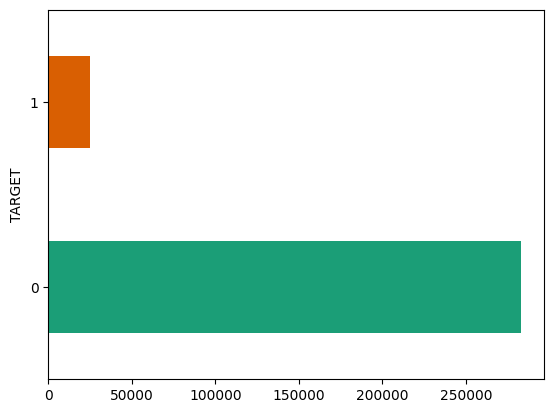

In [28]:
# Check imbalance
print(new_data.TARGET.value_counts())
new_data.groupby('TARGET').size().plot(kind='barh',color=sns.palettes.mpl_palette('Dark2'))

In [29]:
TARGET_0=new_data[new_data['TARGET']==0]
TARGET_1=new_data[new_data['TARGET']==1]
print(TARGET_0.shape)
print(TARGET_1.shape)

(282686, 25)
(24825, 25)


##Upsample

In [31]:
from sklearn.utils import resample
TARGET_1_upsampled=resample(TARGET_1,replace=True,n_samples=len(TARGET_0),random_state=42)
new_df=pd.concat([TARGET_0,TARGET_1_upsampled])
new_df['TARGET'].value_counts()

,count
TARGET,
0,282686
1,282686


##Shuffle the data

In [32]:
from sklearn.utils import shuffle
new_df = pd.concat([TARGET_0,TARGET_1_upsampled])
new_data=shuffle(new_df)
new_data.head()

,TARGET,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE,...,FLOORSMAX_MODE,DAYS_REGISTRATION,AMT_GOODS_PRICE,OWN_CAR_AGE,REGION_POPULATION_RELATIVE,ELEVATORS_AVG,ELEVATORS_MEDI,FLOORSMIN_AVG,FLOORSMIN_MEDI,AGE
262618,0,0.508287,0.432571,0.505998,3,3,-1574.0,-5163,1,1,...,0.1667,-559.0,265500.0,9.0,0.020246,0.0,0.0,0.2083,0.2083,40
140683,1,0.306202,0.404001,0.505998,3,3,-311.0,-4192,0,0,...,0.1667,-406.0,202500.0,9.0,0.018209,0.0,0.0,0.2083,0.2083,60
54014,1,0.099504,0.019075,0.505998,2,2,-2370.0,-4350,0,0,...,0.1667,-10031.0,180000.0,9.0,0.025164,0.0,0.0,0.2083,0.2083,65
137390,0,0.535276,0.554946,0.505998,2,2,-1064.0,-1323,0,1,...,0.1667,-1083.0,900000.0,9.0,0.018801,0.0,0.0,0.2083,0.2083,48
209473,1,0.362277,0.536092,0.505998,2,2,0.0,-1214,0,1,...,0.1667,-3364.0,225000.0,9.0,0.009175,0.0,0.0,0.2083,0.2083,23


In [34]:
X = new_data.drop('TARGET',axis=1)
y = new_data['TARGET']
print('X shape -> ',X.shape)
print('y shape -> ',y.shape)

X shape ->  (565372, 24)
y shape ->  (565372,)


##Get Train and Test splits

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Create ANN using keras & tf

###Create model architecture

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
# l2 regularizer
from tensorflow.keras.regularizers import l2
from tensorflow import keras
model=Sequential()
# this will eliminate UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
inputs = keras.Input(shape=(X_train.shape[1],))
model.add(inputs)
# add first hidden layer
model.add(Dense(units=32,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
# add scond hidden layer
model.add(Dense(units=64,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
# third hidden layer
model.add(Dense(units=128,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
# output
model.add(Dense(1,activation='sigmoid'))
print('model created')

model created


In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,257 (47.88 KB)

 Trainable params: 11,809 (46.13 KB)

 Non-trainable params: 448 (1.75 KB)

###Compile the model

In [38]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
print('model compiled')

model compiled


In [39]:
# set up early stopping and model checkpoint call backs and train the model.
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10,min_delta=0.01)
checkpoint=ModelCheckpoint('best_model.h5',monitor='val_loss',mode='min',verbose=1,save_best_only=True)
history=model.fit(X_train,y_train,
                  epochs=50,batch_size=250,
                  validation_data=(X_test,y_test),
                  callbacks=[early_stop,checkpoint])

Epoch 1/50
1810/1810 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6243 - loss: 0.7606
Epoch 1: val_loss improved from inf to 0.63880, saving model to best_model.h5


1810/1810 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6243 - loss: 0.7605 - val_accuracy: 0.6572 - val_loss: 0.6388
Epoch 2/50
1797/1810 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6541 - loss: 0.6356
Epoch 2: val_loss improved from 0.63880 to 0.62524, saving model to best_model.h5


1810/1810 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6541 - loss: 0.6356 - val_accuracy: 0.6582 - val_loss: 0.6252
Epoch 3/50
1802/1810 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6571 - loss: 0.6268
Epoch 3: val_loss did not improve from 0.62524
1810/1810 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6571 - loss: 0.6268 - val_accuracy: 0.6573 - val_loss: 0.6253
Epoch 4/50
1790/1810 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6554 - loss: 0.6266
Epoch 4: val_loss improved from 0.62524 to 0.62465, saving model to best_model.h5


1810/1810 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6554 - loss: 0.6266 - val_accuracy: 0.6590 - val_loss: 0.6247
Epoch 5/50
1808/1810 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6562 - loss: 0.6256
Epoch 5: val_loss improved from 0.62465 to 0.62283, saving model to best_model.h5


1810/1810 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6562 - loss: 0.6256 - val_accuracy: 0.6586 - val_loss: 0.6228
Epoch 6/50
1796/1810 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6583 - loss: 0.6241
Epoch 6: val_loss improved from 0.62283 to 0.62257, saving model to best_model.h5


1810/1810 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6583 - loss: 0.6241 - val_accuracy: 0.6592 - val_loss: 0.6226
Epoch 7/50
1801/1810 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6561 - loss: 0.6246
Epoch 7: val_loss did not improve from 0.62257
1810/1810 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6561 - loss: 0.6246 - val_accuracy: 0.6586 - val_loss: 0.6227
Epoch 8/50
1790/1810 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6569 - loss: 0.6252
Epoch 8: val_loss did not improve from 0.62257
1810/1810 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6569 - loss: 0.6252 - val_accuracy: 0.6595 - val_loss: 0.6226
Epoch 9/50
1794/1810 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6566 - loss: 0.6249
Epoch 9: val_loss did not improve from 0.62257
1810/1810 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6566 - loss: 0.6249 - val_accuracy: 0.6602 - val_loss: 0.6239
Epoch 10/50
1793/1810 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6569 - loss: 0.6250
Epoch 10: val_loss did not i

1810/1810 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6580 - loss: 0.6244 - val_accuracy: 0.6589 - val_loss: 0.6225
Epoch 12/50
1804/1810 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6572 - loss: 0.6237
Epoch 12: val_loss improved from 0.62252 to 0.62238, saving model to best_model.h5


1810/1810 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6572 - loss: 0.6237 - val_accuracy: 0.6594 - val_loss: 0.6224
Epoch 12: early stopping


In [40]:
score=model.evaluate(X_test,y_test)
print('test loss',score[0])
print('test accuracy',score[1])
score=model.evaluate(X_train,y_train)
print('train loss',score[0])
print('train accuracy',score[1])

3534/3534 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6594 - loss: 0.6227
test loss 0.6223814487457275
test accuracy 0.6593676805496216
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.6625 - loss: 0.6192
train loss 0.620086133480072
train accuracy 0.6611164808273315


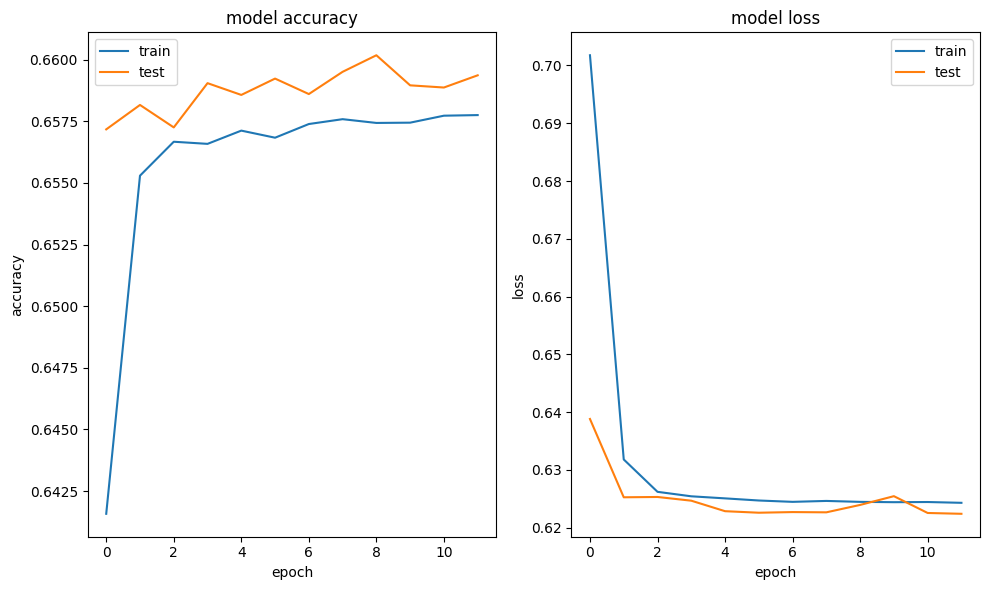

In [41]:

plt.figure(figsize=(10,6))
# accuracy chart
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

# loss chart
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.tight_layout()
plt.show()

##Metrics

In [102]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report
import tensorflow as tf
predictions = model.predict(X_test)

3534/3534 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


array([0.59114134], dtype=float32)

In [106]:
score = tf.nn.sigmoid(predictions).numpy()
y_pred = []
y_pred_proba = []
for i in range(len(score)):
  y_pred_proba.append(score[i])
  if score[i] > 0.62:
    y_pred.append(1)
  else:
    y_pred.append(0)

###Confusion Matrix and Classification Report

Confusion Matrix Displayed



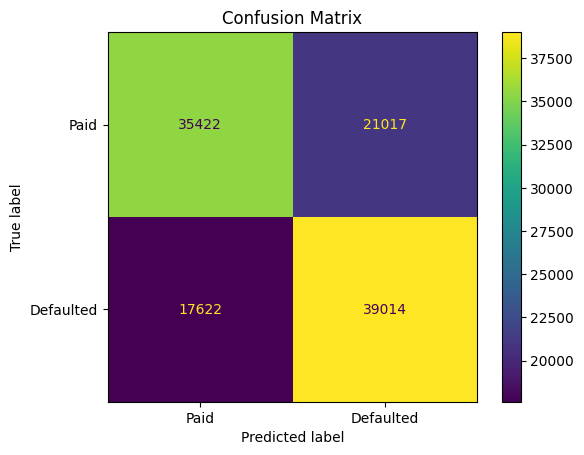

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.63      0.65     56439
           1       0.65      0.69      0.67     56636

    accuracy                           0.66    113075
   macro avg       0.66      0.66      0.66    113075
weighted avg       0.66      0.66      0.66    113075

Sensitivity = 0.6889


In [100]:
cm = confusion_matrix(y_test,y_pred)

print('Confusion Matrix Displayed\n')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Paid','Defaulted'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()
cl_report = classification_report(y_test,y_pred)
print('Classification Report:')
print(cl_report)



###Sensitivity

In [101]:
# calculate sensitivity
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

sensitivity = TP/(TP+FN)

print(f'Sensitivity = {sensitivity:.4f}')

Sensitivity = 0.6889


###ROC AUC curve

auc = 0.7159254091615231



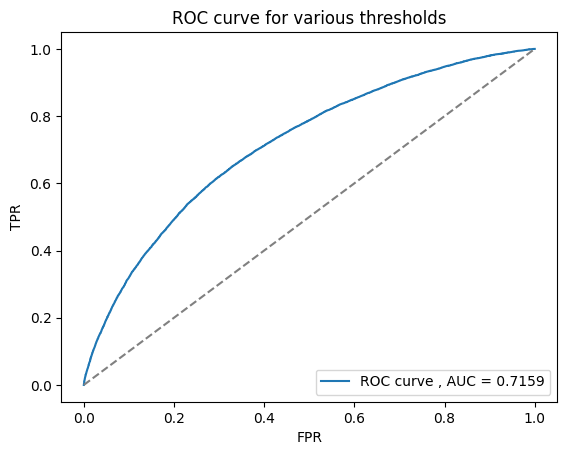

In [107]:
#ROC
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold = roc_curve(y_test, y_pred_proba)
area_under_curve = auc(fpr,tpr)
print('auc = {}\n'.format(area_under_curve))
plt.plot(fpr,tpr,label=f'ROC curve , AUC = {area_under_curve:.4f}')
plt.plot([0,1],[0,1],linestyle='--',color='gray')
plt.xlabel('FPR')
plt.ylabel('TPR')
title_ = 'ROC curve for various thresholds'
plt.title(title_)
plt.legend(loc = 'lower right')
plt.show()


##Prediction using Random Forest Classifier

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9972584567764758


###Confusion Matrix and Classification Report

confusion matrix
 [[56133   306]
 [    4 56632]]


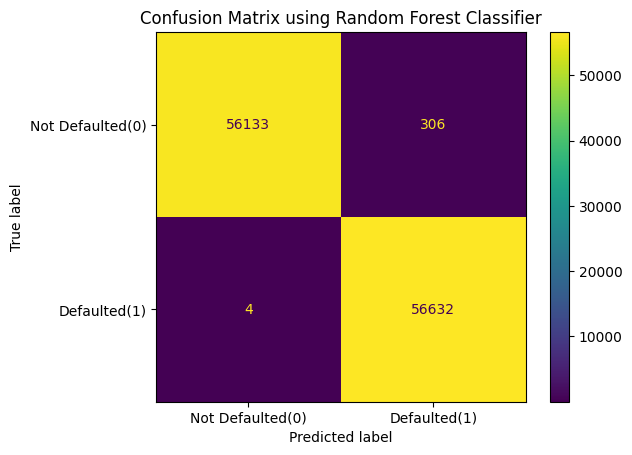

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56439
           1       0.99      1.00      1.00     56636

    accuracy                           1.00    113075
   macro avg       1.00      1.00      1.00    113075
weighted avg       1.00      1.00      1.00    113075



In [110]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix\n',cm)
display_labels = ['Not Defaulted(0)','Defaulted(1)']
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=display_labels)
disp.plot()
plt.title('Confusion Matrix using Random Forest Classifier')
plt.show()
print('Classification Report:')
print(classification_report(y_test,y_pred))

###Sensitivity

In [111]:
# calculate sensitivity
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

sensitivity = TP/(TP+FN)

print(f'Sensitivity = {sensitivity:.4f}')

Sensitivity = 0.9999


##ROC-AUC Curve

auc = 0.9999527724129064



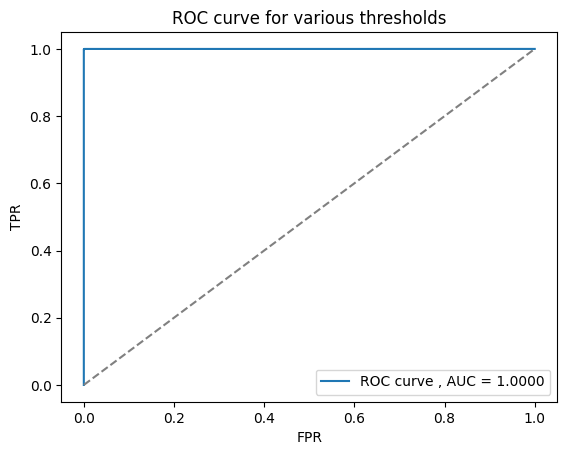

In [112]:
#ROC
from sklearn.metrics import roc_curve,auc

y_pred_test_prob = rf.predict_proba(X_test)
y_pred_proba=y_pred_test_prob[:,1]
fpr,tpr,threshold = roc_curve(y_test, y_pred_proba)
area_under_curve = auc(fpr,tpr)
print('auc = {}\n'.format(area_under_curve))
plt.plot(fpr,tpr,label=f'ROC curve , AUC = {area_under_curve:.4f}')
plt.plot([0,1],[0,1],linestyle='--',color='gray')
plt.xlabel('FPR')
plt.ylabel('TPR')
title_ = 'ROC curve for various thresholds'
plt.title(title_)
plt.legend(loc = 'lower right')
plt.show()


**Conclusion**

For structured input data, classical ML models seem to outperform deep learning models